In [87]:
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import pandas as pd
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({'xtick.direction': 'in','xtick.top':True,'xtick.minor.visible': True,
               'ytick.direction': "in",'ytick.right': True,'ytick.minor.visible': True})
cmap1 = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1., as_cmap=True)
cmap2 = sea.cubehelix_palette(12, start=2, rot=.5, dark=0, light=1., as_cmap=True)

In [80]:
sea.set_style.func_globals

{'LooseVersion': <class distutils.version.LooseVersion at 0x109fa29a8>,
 '_AxesStyle': seaborn.rcmod._AxesStyle,
 '_PlottingContext': seaborn.rcmod._PlottingContext,
 '_RCAesthetics': seaborn.rcmod._RCAesthetics,
 '__all__': ['set',
  'reset_defaults',
  'reset_orig',
  'axes_style',
  'set_style',
  'plotting_context',
  'set_context',
  'set_palette'],
 '__builtins__': {'ArithmeticError': ArithmeticError,
  'AssertionError': AssertionError,
  'AttributeError': AttributeError,
  'BaseException': BaseException,
  'BufferError': BufferError,
  'BytesWarning': BytesWarning,
  'DeprecationWarning': DeprecationWarning,
  'EOFError': EOFError,
  'Ellipsis': Ellipsis,
  'EnvironmentError': EnvironmentError,
  'Exception': Exception,
  'False': False,
  'FloatingPointError': FloatingPointError,
  'FutureWarning': FutureWarning,
  'GeneratorExit': GeneratorExit,
  'IOError': IOError,
  'ImportError': ImportError,
  'ImportWarning': ImportWarning,
  'IndentationError': IndentationError,
  'Inde

In [3]:
galDB = pd.read_pickle('../data/sgal_param_DB.pkl')
metal=np.arange(0.002,0.031,0.001)
age=np.arange(.5,6.1,.1)
tau=[0,8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28,
     9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]
M,A=np.meshgrid(metal,age)

In [65]:
# gals = ['s39170','n21156','s40862','s44042']
gals = ['s44042']#,'n21156','s40862','s44042']
# mp = [0.01,0.008,0.012,0.015,0.016,0.019,0.019,0.024]
# ap = [2.0,3.3,4.0,3.0,4.7,2.5,4.5,3.5,]
mp = [0.01,0.012,0.016,0.019,0.019]
ap = [2.0,4.0,4.7,2.5,4.5,]
m_mn,mnc_mn,mdf3_mn,mdf2_mn,mdf1_mn = [[],[],[],[],[]]
a_mn,anc_mn,adf3_mn,adf2_mn,adf1_mn = [[],[],[],[],[]]

m_sd,mnc_sd,mdf3_sd,mdf2_sd,mdf1_sd = [[],[],[],[],[]]
a_sd,anc_sd,adf3_sd,adf2_sd,adf1_sd = [[],[],[],[],[]]

for i in range(len(gals)):
    for ii in range(len(mp)):
        # print '../mcerr/%s_m%s_a%s.npy' % (gals[i],mp[ii],ap[ii])
        m,a = np.load('../mcerr/%s_m%s_a%s.npy' % (gals[i],mp[ii],ap[ii]))
        mnc,anc = np.load('../mcerr/%s_m%s_a%sNC.npy' % (gals[i],mp[ii],ap[ii]))
        mdf3,adf3 = np.load('../mcerr/%s_m%s_a%sDF3d.npy' % (gals[i],mp[ii],ap[ii]))
        mdf2,adf2 = np.load('../mcerr/%s_m%s_a%sDF2d.npy' % (gals[i],mp[ii],ap[ii]))
        mdf1,adf1 = np.load('../mcerr/%s_m%s_a%sDF1d.npy' % (gals[i],mp[ii],ap[ii]))
        ##
        m_mn.append(np.mean(m) - mp[ii])
        mnc_mn.append(np.mean(mnc) - mp[ii])
        mdf3_mn.append(np.mean(mdf3) - mp[ii])
        mdf2_mn.append(np.mean(mdf2) - mp[ii])
        mdf1_mn.append(np.mean(mdf1) - mp[ii])
        a_mn.append(np.mean(a) - ap[ii])
        anc_mn.append(np.mean(anc) - ap[ii])
        adf3_mn.append(np.mean(adf3) - ap[ii])
        adf2_mn.append(np.mean(adf2) - ap[ii])
        adf1_mn.append(np.mean(adf1) - ap[ii])
        ##
        m_sd.append(np.std(m))
        mnc_sd.append(np.std(mnc))
        mdf3_sd.append(np.std(mdf3))
        mdf2_sd.append(np.std(mdf2))
        mdf1_sd.append(np.std(mdf1))
        a_sd.append(np.std(a))
        anc_sd.append(np.std(anc))
        adf3_sd.append(np.std(adf3))
        adf2_sd.append(np.std(adf2))
        adf1_sd.append(np.std(adf1))

In [67]:
gals = ['s39170','n21156','s40862','s44042']
mp = [0.01,0.008,0.012,0.015,0.016,0.019,0.019,0.024]
ap = [2.0,3.3,4.0,3.0,4.7,2.5,4.5,3.5,]

m_mn,mdf1_mn = np.array([[],[]])
a_mn,adf1_mn = np.array([[],[]]) 

for i in range(len(gals)):
    for ii in range(len(mp)):
        m,a = np.load('../mcerr/%s_m%s_a%s.npy' % (gals[i],mp[ii],ap[ii]))
        mdf1,adf1 = np.load('../mcerr/%s_m%s_a%sDF1d.npy' % (gals[i],mp[ii],ap[ii]))
        ##
        m_mn = np.append(m_mn,m - mp[ii])
        mdf1_mn = np.append(mdf1_mn,mdf1 - mp[ii])
        a_mn = np.append(a_mn,a - ap[ii])
        adf1_mn = np.append(adf1_mn,adf1 - ap[ii])

0.000640001252505 0.00365169126128
0.000294327154309 0.00348861585924
0.473547094188 0.639999185791
0.600200400802 0.637802162127


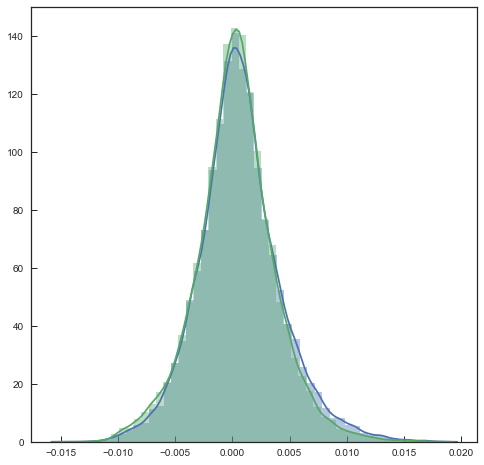

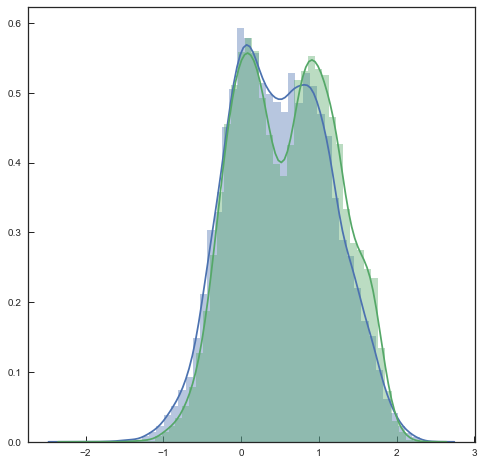

In [69]:
print np.mean(m_mn),np.std(m_mn)
print np.mean(mdf1_mn),np.std(mdf1_mn)
print np.median(a_mn),np.std(a_mn)
print np.median(adf1_mn),np.std(adf1_mn)

plt.figure(figsize=[8,8])
sea.distplot(m_mn)
sea.distplot(mdf1_mn)
plt.show()
plt.close()

plt.figure(figsize=[8,8])
sea.distplot(a_mn)
sea.distplot(adf1_mn)
plt.show()
plt.close()

In [59]:
def Plot_2d(metal_list, age_list, true_m, true_a, title):
    plt.figure(figsize=[8,8])
    sea.kdeplot(metal_list, age_list,n_levels = 5)
    plt.scatter(metal_list, age_list, marker='o')
    plt.title(title)
    plt.scatter(true_m, true_a,color='r')
    # plt.axis([0,0.03,0,6])
    plt.show()
    plt.close()

In [89]:
mp = [0.01,0.008,0.012,0.015,0.016,0.019,0.019,0.024]
ap = [2.0,3.3,4.0,3.0,4.7,2.5,4.5,3.5,]

ms39,as39 = np.array([[],[]])
mn21,an21 = np.array([[],[]])
ms40,as40 = np.array([[],[]])
ms44,as44 = np.array([[],[]])


for i in range(len(mp)):
    # mdf1,adf1 = np.load('../mcerr/s39170_m%s_a%sDF1d.npy' % (mp[i],ap[i]))
    mdf1,adf1 = np.load('../mcerr/s39170_m%s_a%s.npy' % (mp[i],ap[i]))
    ms39 = np.append(ms39,mdf1 - mp[i])
    as39 = np.append(as39,adf1 - ap[i])
    
    # mdf1,adf1 = np.load('../mcerr/n21156_m%s_a%sDF1d.npy' % (mp[i],ap[i]))
    mdf1,adf1 = np.load('../mcerr/n21156_m%s_a%s.npy' % (mp[i],ap[i]))
    mn21 = np.append(mn21,mdf1 - mp[i])
    an21 = np.append(an21,adf1 - ap[i])
    
    # mdf1,adf1 = np.load('../mcerr/s40862_m%s_a%sDF1d.npy' % (mp[i],ap[i]))
    mdf1,adf1 = np.load('../mcerr/s40862_m%s_a%s.npy' % (mp[i],ap[i]))
    ms40 = np.append(ms40,mdf1 - mp[i])
    as40 = np.append(as40,adf1 - ap[i])
    
    # mdf1,adf1 = np.load('../mcerr/s44042_m%s_a%sDF1d.npy' % (mp[i],ap[i]))
    mdf1,adf1 = np.load('../mcerr/s44042_m%s_a%s.npy' % (mp[i],ap[i]))
    ms44 = np.append(ms44,mdf1 - mp[i])
    as44 = np.append(as44,adf1 - ap[i])

-0.00734252715958 0.160186309646
0.0189766902226 0.165287325005
0.0580175087016 0.214034484907
0.0650854340259 0.213275866838
0.461426978958 0.616265251244
0.437788827655 0.608370767359
0.624230836673 0.670172725921
0.455673471944 0.645537946853


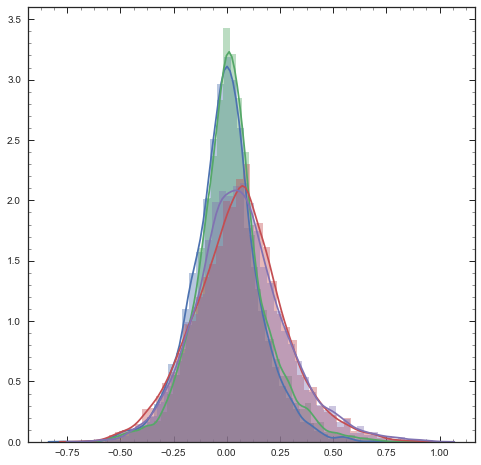

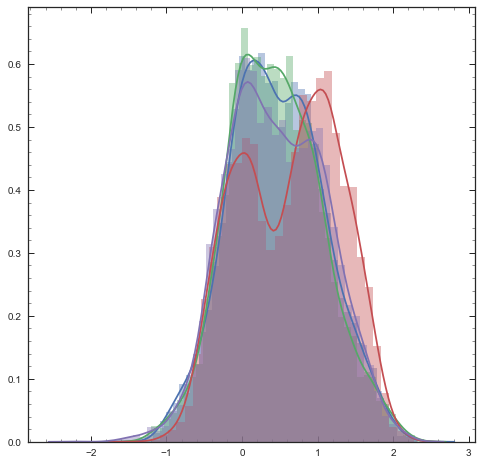

In [91]:
print np.mean(ms39/.019),np.std(ms39/.019)
print np.mean(mn21/.019),np.std(mn21/.019)
print np.mean(ms40/.019),np.std(ms40/.019)
print np.mean(ms44/.019),np.std(ms44/.019)
print np.mean(as39),np.std(as39)
print np.mean(an21),np.std(an21)
print np.mean(as40),np.std(as40)
print np.mean(as44),np.std(as44)


plt.figure(figsize=[8,8])
sea.distplot(ms39/.019)
sea.distplot(mn21/.019)
sea.distplot(ms40/.019)
sea.distplot(ms44/.019)
plt.show()
plt.close()

plt.figure(figsize=[8,8])
sea.distplot(as39)
sea.distplot(an21)
sea.distplot(as40)
sea.distplot(as44)
plt.show()
plt.close()